## Numerical analysis of monthly charges and tenure on people who churned and people who did not churn seperately

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
all_customers = pd.read_csv("Telco_Customer_Churn.csv")
#all_customers.isna().sum()
all_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
filter = (all_customers["Churn"] == 'No')
customer_stayed = all_customers[filter]

#Customers who left
filter = (all_customers["Churn"] == 'Yes')
customer_left = all_customers[filter]

## Helper Functions

In [5]:
def kdeplot(feature,title, churn):
    global all_customers
    df = all_customers
        
    plt.figure(figsize=(9, 4))
    plt.title(title)
    if churn:
        ax0 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(),hist=True, kde=True, 
                 color = 'darkblue',  label= 'Churn: Yes',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    if not churn:
        
        ax1 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(),hist=True, kde=True, 
                 color = 'orange',  label= 'Churn: No',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
        
def plt_hist(data, title, bins=10):
    plt.hist(data, bins=bins, edgecolor="black")
    plt.title(title)
    plt.xlabel("MonthlyCharges (USD)")
    plt.ylabel("Count")

# MonthlyCharges and Tenure (Churn=Yes)

## MonthlyCharges

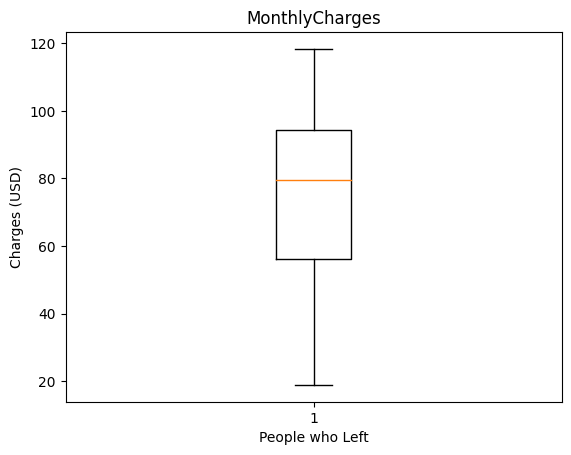

STD = 24.67
Mean = 74.44
Q1 = 56.15
Q2 = 79.65
Q3 = 94.2
Unique Values = 910
Mode = 74.4


In [6]:
# Basic Numerical Analysis of MonthlyCharges , for people who left
Charges = np.array(customer_left["MonthlyCharges"])
Charges_mean = round(Charges.mean(), 2)
Charges_std = round(Charges.std(ddof=1), 2)

plt.title("MonthlyCharges")
plt.xlabel("People who Left")
plt.ylabel("Charges (USD)")
plt.boxplot(Charges)
plt.show()

print (f"STD = {Charges_std}")
print (f"Mean = {Charges_mean}")
print (f"Q1 = {customer_left.MonthlyCharges.quantile(0.25)}")
print (f"Q2 = {customer_left.MonthlyCharges.quantile(0.50)}")
print (f"Q3 = {customer_left.MonthlyCharges.quantile(0.75)}")
print(f"Unique Values = {customer_left.MonthlyCharges.nunique()}")
print(f"Mode = {customer_left.MonthlyCharges.mode().values[0]}")


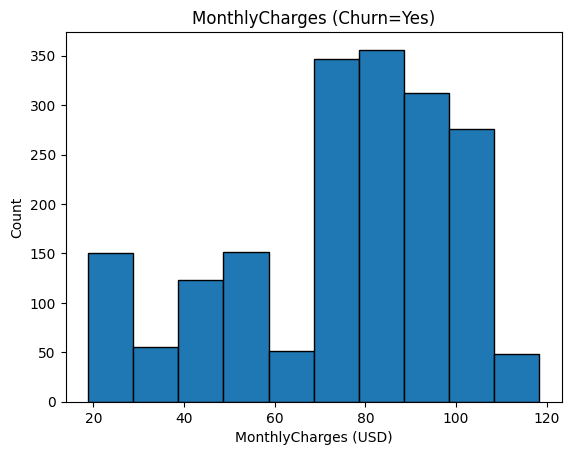

In [7]:
plt_hist(customer_left['MonthlyCharges'], title="MonthlyCharges (Churn=Yes)")

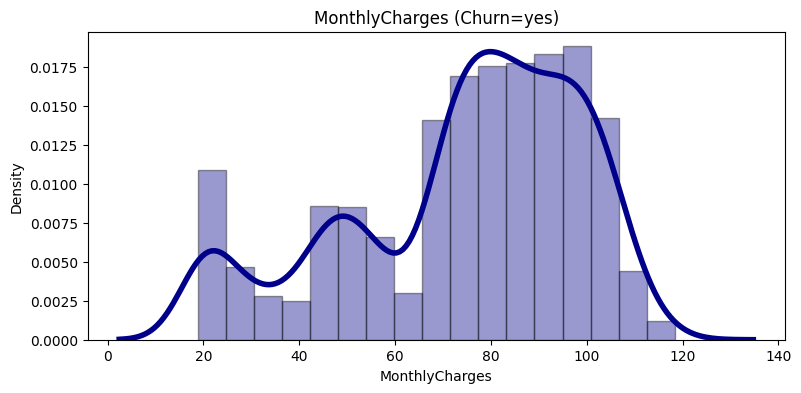

In [8]:
kdeplot('MonthlyCharges', 'MonthlyCharges (Churn=yes)', churn=True)

## Tenure

1869
Tenure mean = 17.98
Tenure STD = 19.53


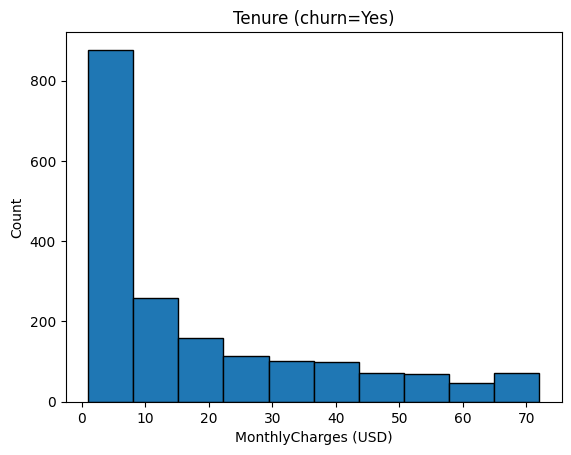

In [9]:
months = np.array(customer_left["tenure"])
print (len(months))
months_mean = round(months.mean(),2)
months_std = round(months.std(),2)

print (f"Tenure mean = {months_mean}")
print (f"Tenure STD = {months_std}")


plt_hist(months, "Tenure (churn=Yes)")

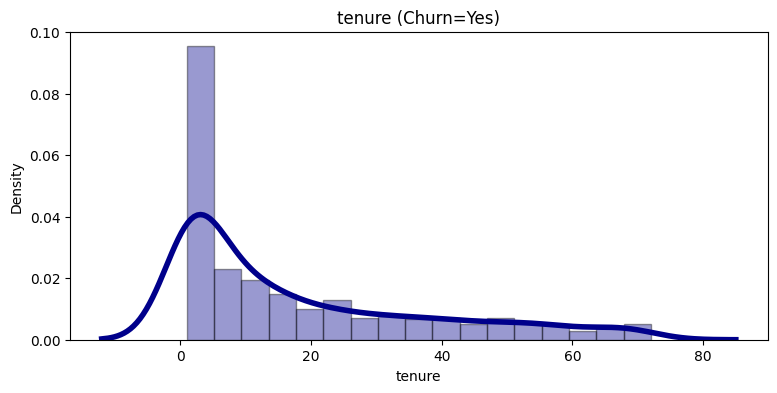

In [10]:
kdeplot('tenure', 'tenure (Churn=Yes)', churn=True)

# MonthlyCharges and Tenure (Churn=No)

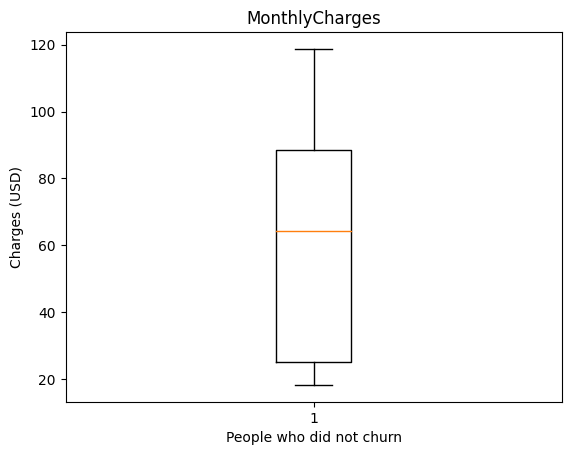

STD = 31.09
Mean = 61.27
Q1 = 25.1
Q2 = 64.43
Q3 = 88.4
Unique Values = 1460
Mode = 20.05


In [11]:
Charges = np.array(customer_stayed["MonthlyCharges"])
Charges_mean = round(Charges.mean(), 2)
Charges_std = round(Charges.std(ddof=1), 2)

plt.title("MonthlyCharges")
plt.xlabel("People who did not churn")
plt.ylabel("Charges (USD)")
plt.boxplot(Charges)
plt.show()

print (f"STD = {Charges_std}")
print (f"Mean = {Charges_mean}")
print (f"Q1 = {customer_stayed.MonthlyCharges.quantile(0.25)}")
print (f"Q2 = {round(customer_stayed.MonthlyCharges.quantile(0.50), 2)}")
print (f"Q3 = {customer_stayed.MonthlyCharges.quantile(0.75)}")
print(f"Unique Values = {customer_stayed.MonthlyCharges.nunique()}")
print(f"Mode = {customer_stayed.MonthlyCharges.mode().values[0]}")

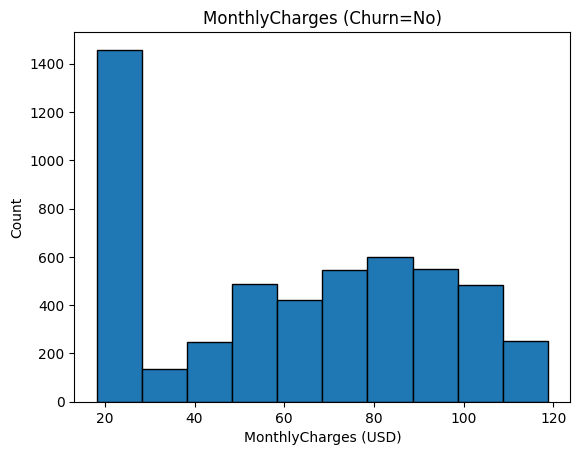

In [12]:
plt_hist(customer_stayed['MonthlyCharges'], title="MonthlyCharges (Churn=No)")

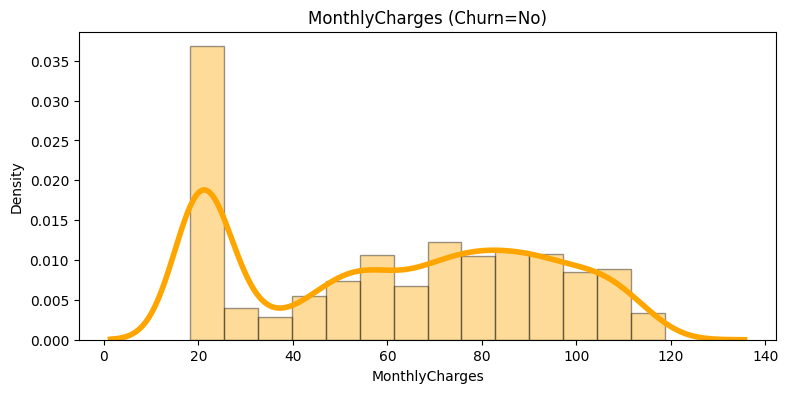

In [13]:
kdeplot('MonthlyCharges', 'MonthlyCharges (Churn=No)', churn=False)

## Tenure

5174
Tenure mean = 37.57
Tenure STD = 24.11


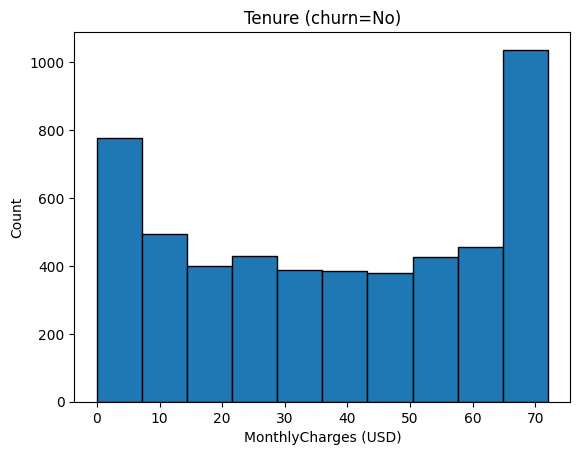

In [14]:
months = np.array(customer_stayed["tenure"])
print (len(months))
months_mean = round(months.mean(),2)
months_std = round(months.std(),2)

print (f"Tenure mean = {months_mean}")
print (f"Tenure STD = {months_std}")


plt_hist(months, "Tenure (churn=No)")

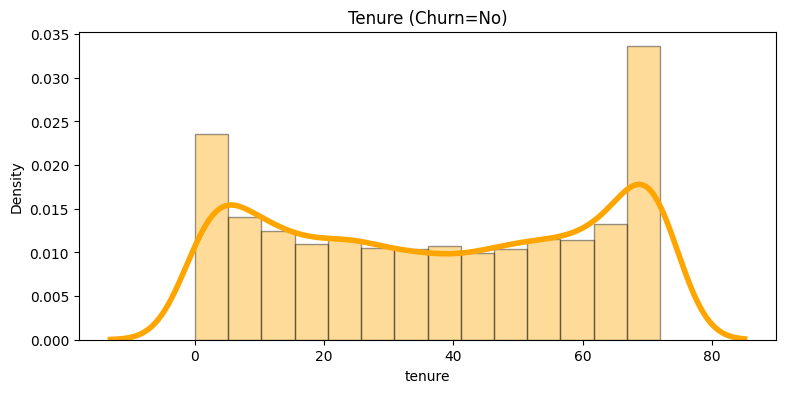

In [15]:
kdeplot('tenure', 'Tenure (Churn=No)', churn=False)

# Note
1) Average Monthly Charges for (churn=No)  = 61.3 USD/Month
2) Average Monthly Charges for (churn=Yes)  = 74.4 USD/Month

That might be because 27% of people who still did not leave , dont have internet and only 34% have fiber